In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 1. Load the image

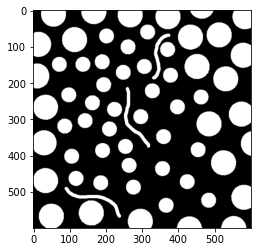

In [68]:
circles_img = cv2.imread('circles.png', 0)
plt.imshow(circles_img, cmap='gray', vmin=circles_img.min(), vmax=circles_img.max())

In [69]:
circles_img[160, 350]

255

### 2. Perform extraction of connected components

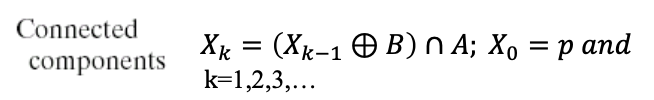

In [70]:
def dilation(img, elem_size):
    component = np.ones((elem_size, elem_size), np.uint8)
    return cv2.dilate(img, component)

In [71]:
def extract_connected_comps(img, p, d):
    X = np.zeros(img.shape, dtype=img.dtype)
    X[p[0], p[1]] = img[p[0], p[1]]
    while(True):
        dilated_X = dilation(X, d)
        img_bwa = cv2.bitwise_and(dilated_X,img)
        if np.array_equal(img_bwa, X):
            break
        X = img_bwa
    return X

In [72]:
# define coordinates of the lines
p1, p2, p3 = (500, 100), (350, 300), (160, 350)

In [73]:
# remove all lines
for p in [p1, p2, p3]:
    X = extract_connected_comps(circles_img, p, 3)
    circles_img = circles_img - X

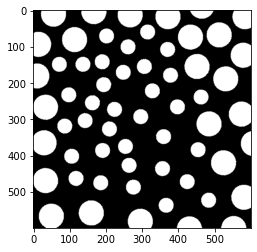

In [74]:
plt.imshow(circles_img, cmap='gray', vmin=circles_img.min(), vmax=circles_img.max())